# Computer Vision color spaces

### Import statements

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

### To edit an image making a copy of it is always a good idea!

In [2]:
# Load an image
# And make a copy of the original image to avoid manipulating the original image
path = 'img/blue-flowers.jpg'
img = cv2.imread(path)

In [3]:
img1 = cv2.imread('img/blue-red-flowers.png')
img1_copy = img1.copy()
img2 =cv2.imread('img/hsv.png')
img2_copy = img2.copy()
img3 = cv2.imread('img/m.jpg')
img3_copy = img3.copy()
img4 = cv2.imread('img/purple-flowers.jpg')
img4_copy = img4.copy()

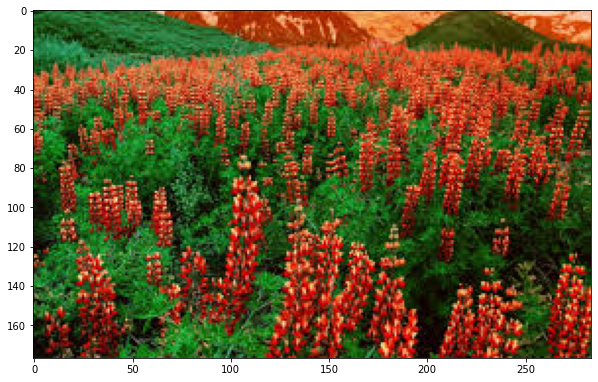

In [4]:
plt.figure(figsize=(10,15))
plt.imshow(img)

In [5]:
img_copy = img.copy()
print(img_copy.shape,img.shape)

(177, 284, 3) (177, 284, 3)


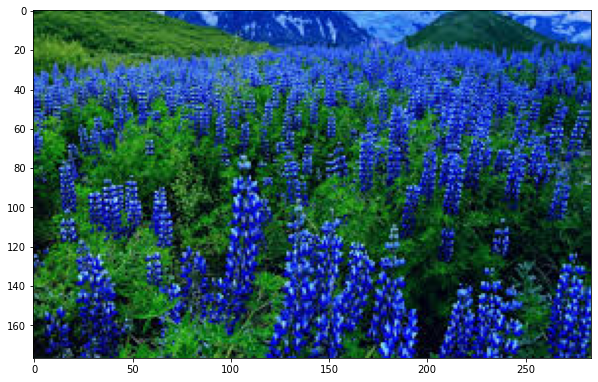

In [6]:
rgb_img_copy = cv2.cvtColor(img_copy,cv2.COLOR_BGR2RGB) # coverting bgr to rgb image
plt.figure(figsize=(10,15))
plt.imshow(rgb_img_copy)

In [7]:
cv2.imshow('blue_flower',img_copy)
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.waitKey(1)

-1

[Hint](# "Numpy .copy function") 

## Color Spaces

### BGR Spliting the color channels

In [8]:
# Load a color image and split in is different B, G and R channels
b,g,r = cv2.split(img_copy)

In [9]:
r

array([[ 10,  21,  24, ..., 149, 149, 150],
       [  0,   0,   2, ..., 154, 156, 157],
       [ 49,  45,  53, ..., 162, 161, 161],
       ...,
       [ 11,  12,  10, ...,  13,   0,  23],
       [ 20,  13,   5, ...,   0,   0,  28],
       [  7,   8,  10, ...,   0,  38,  69]], dtype=uint8)

[Hint](# "cv2.split") 

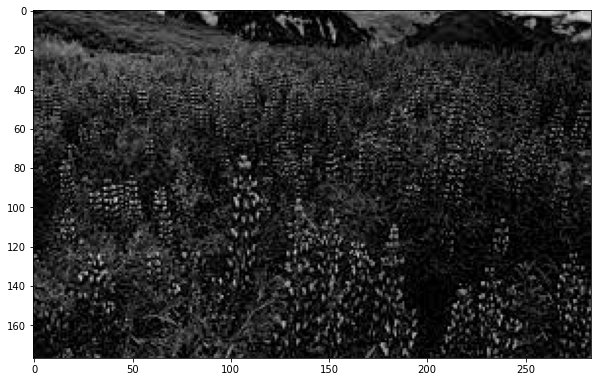

In [10]:
# Show each channel channel on screen
plt.figure(figsize=(10,15))
plt.imshow(r,cmap = 'gray')

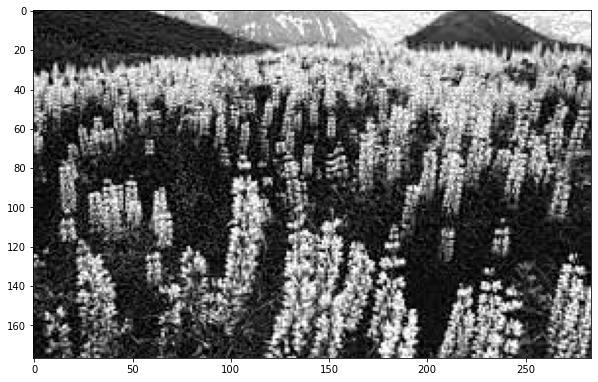

In [11]:
plt.figure(figsize=(10,15))
plt.imshow(b,cmap = 'gray')

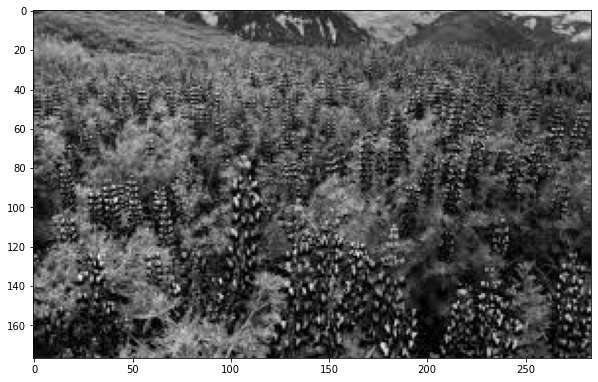

In [12]:
plt.figure(figsize=(10,15))
plt.imshow(g,cmap = 'gray')

#### Merging the color channels

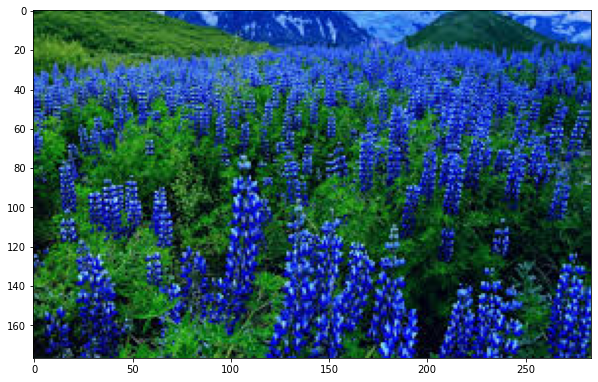

In [13]:
# Modify a channel and then merge them all again
merged_img = cv2.merge([r,g,b])
plt.figure(figsize=(10,15))
plt.imshow(merged_img)

[Hint](# "cv2.merge") 

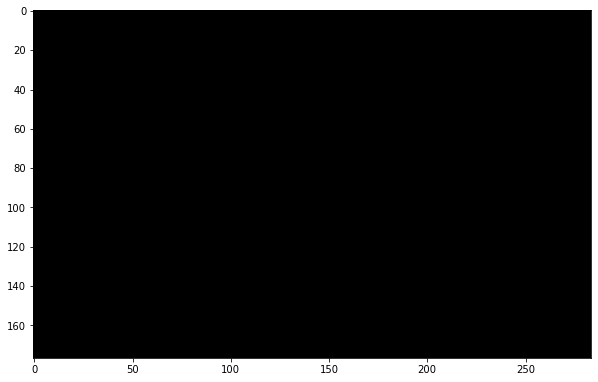

In [14]:
# Create a black canvas with the same size as the image you loaded
k = np.zeros(img_copy.shape[:2],dtype='uint8')
plt.figure(figsize=(10,15))
plt.imshow(k,cmap = 'gray')

[Hint](# "use numpy np.zeros function with the img.shape[:2]") 

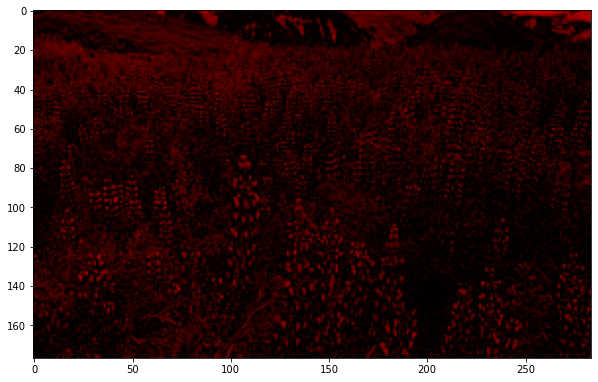

In [15]:
# Merge each channel with the black canvas 
# So you will end up with 3 images: (Red,Black,Black), (Black,Green,Black) and (Black,Black,Blue) 
# Assuming you are working with RGB, but bgr is also fine 
first_img= cv2.merge([k,k,b])
second_img= cv2.merge([r,k,k])
third_img= cv2.merge([k,g,k])
plt.figure(figsize=(10,15))
plt.imshow(second_img)


[Hint](# "cv2.merge") 

### HSV: Hue Saturation Value

#### M&Ms challenge!

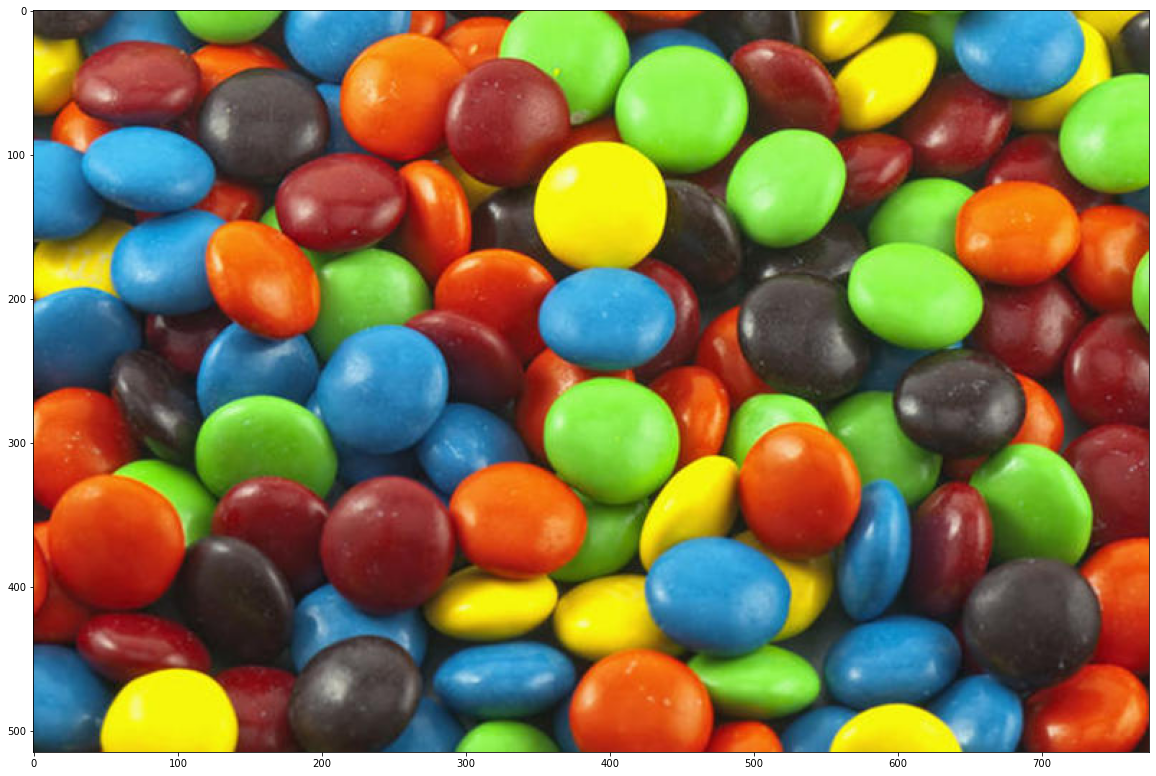

In [106]:
# Use the image below and convert it from BGR to HSV
img = cv2.imread('img/m.jpg')
rgb_img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.figure(figsize = (20,15));
plt.imshow(rgb_img);

In [56]:
# Split the H,S and V channels 
img4_copy = cv2.cvtColor(img4_copy,cv2.COLOR_BGR2RGB)
hsv_img =cv2.cvtColor(img4_copy ,cv2.COLOR_BGR2HSV)
h,s,v =cv2.split(hsv_img)

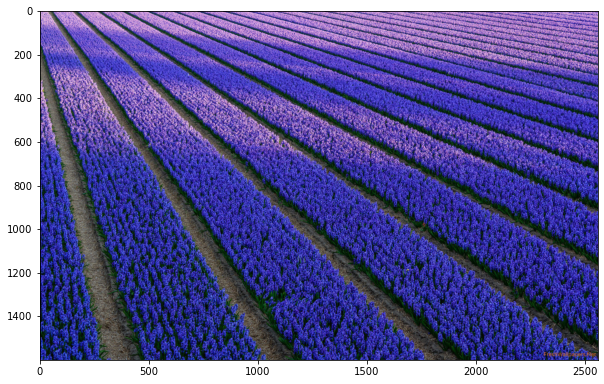

In [57]:
plt.figure(figsize=(10,15))
plt.imshow(img4_copy)

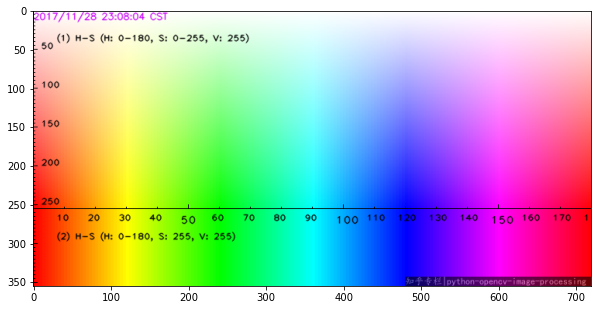

In [23]:
hsv_map =cv2.cvtColor(img2_copy,cv2.COLOR_BGR2RGB)
plt.figure(figsize=(10,15))
plt.imshow(hsv_map)

[Hint](# "cv2.cvtColor") 

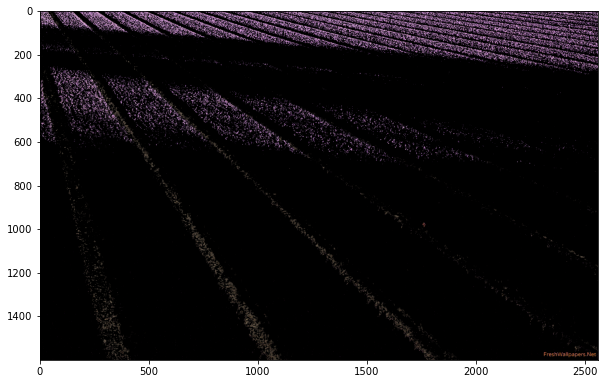

In [60]:
# Create a mask to filter out the Blue M&Ms (remember you need a lower and upper range)
# Make a copy of the hsv image and apply the mask to it, then display the image
hsv_img_copy =hsv_img.copy()
lower = (100,50,20)#h,s,v
upper =(160,255,255)
mask = cv2.inRange(hsv_img_copy,lower,upper) # creating a mask based on range of colors and we need to create a lower and upper bounds

masked_img =img4_copy.copy()

masked_img[mask==0] = [0,0,0]

plt.figure(figsize=(10,15))
plt.imshow(masked_img)

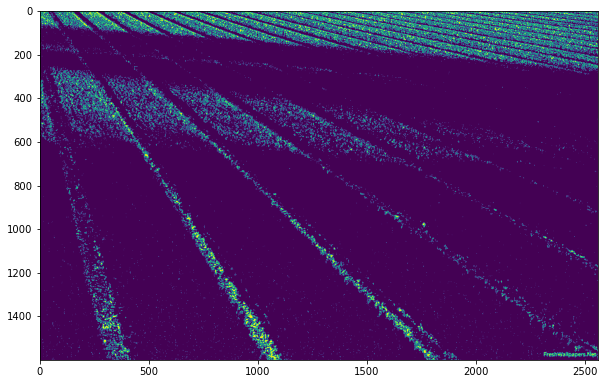

In [47]:
plt.figure(figsize=(10,15))
plt.imshow(mask)

In [61]:
hsv_img =cv2.cvtColor(rgb_img ,cv2.COLOR_BGR2HSV)
h,s,v =cv2.split(hsv_img)

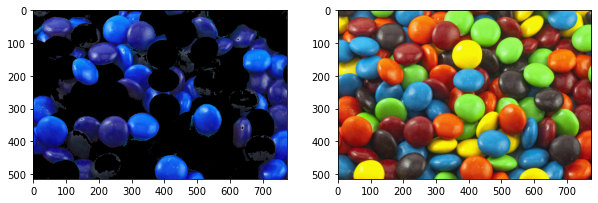

In [110]:
hsv_img_copy =hsv_img.copy()
lower = (100,50,20)#h,s,v
upper =(160,255,255)
mask = cv2.inRange(hsv_img_copy,lower,upper) # creating a mask based on range of colors and we need to create a lower and upper bounds

# mask =cv2.bitwise_not(mask) # 
masked_img =rgb_img.copy()

masked_img[mask==0] = [0,0,0] # other way for masked 
masked_img = cv2.bitwise_and(masked_img,masked_img, mask=mask)
fig=plt.figure(figsize=(10,15))
fig.add_subplot(1,2,1)
plt.imshow(cv2.cvtColor(masked_img,cv2.COLOR_BGR2RGB))
fig.add_subplot(1,2,2)
plt.imshow(cv2.cvtColor(hsv_img,cv2.COLOR_HSV2BGR))

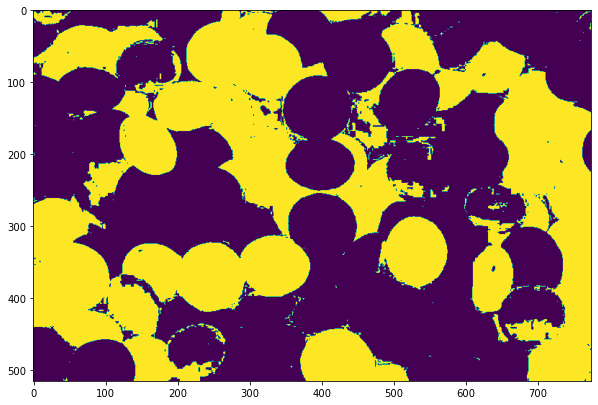

In [78]:
plt.figure(figsize=(10,15))
plt.imshow(mask)

[Hint](# "cv2.inRange") 

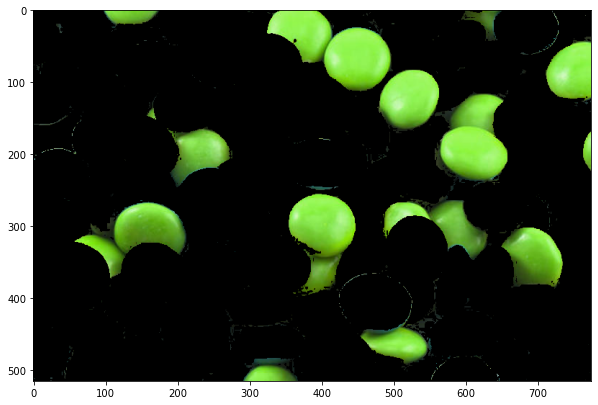

In [83]:
# Repeat the same but now with the greens
hsv_img_copy =hsv_img.copy()
lower = (30,50,20)#h,s,v
upper =(80,255,255)
mask_2 = cv2.inRange(hsv_img_copy,lower,upper) # creating a mask based on range of colors and we need to create a lower and upper bounds

masked_img_2 =rgb_img.copy()

# mask_2 =cv2.bitwise_not(mask_2)
masked_img_2[mask_2==0] = [0,0,0]
masked_img_2 = cv2.bitwise_and(masked_img_2,masked_img_2, mask=mask_2)
plt.figure(figsize=(10,15))
plt.imshow(masked_img_2)

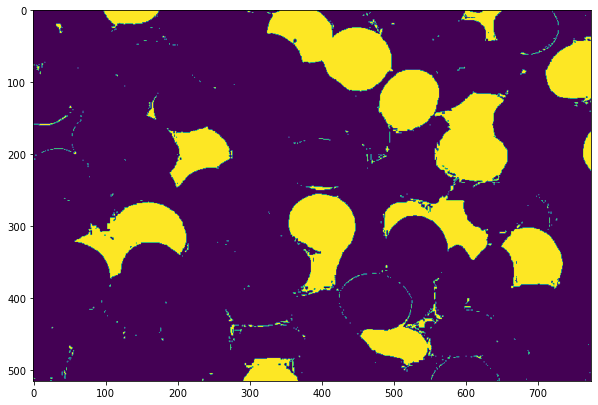

In [84]:
plt.figure(figsize=(10,15))
plt.imshow(mask_2)

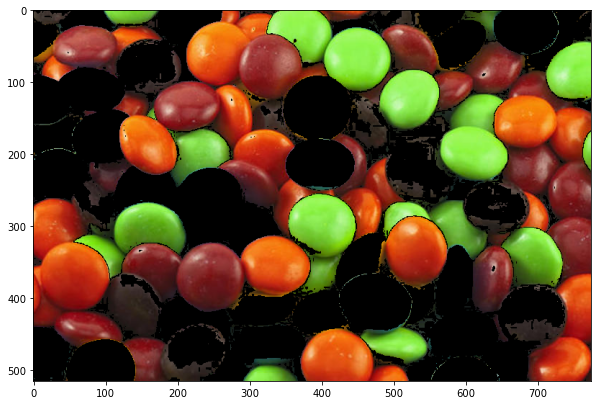

In [95]:
# Now combine both masks togheter so we can see all greens and blues in the same image!
mask_com = mask + mask_2
masked_img_3 =rgb_img.copy()

# mask_2 =cv2.bitwise_not(mask_2)
masked_img_3[mask_com==0] = [0,0,0]
masked_img_3 = cv2.bitwise_and(masked_img_3,masked_img_3, mask=mask_com)
plt.figure(figsize=(10,15))
plt.imshow(masked_img_3)

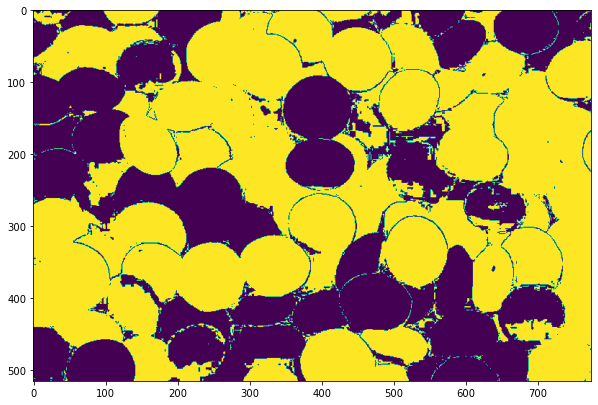

In [99]:
# Now lets combine both masks but also some opacity, we want to be able to see all M&Ms but
# Blues and greens will show as int he image above while the other colors will be faded out with some opacity
# You just need to add alpha to apply opacity to the dark parts of the mask, then display the image

opacity = 0.8
beta =1-opacity
image = cv2.addWeighted(mask,opacity,mask_com,1,0)
plt.figure(figsize=(10,15))
plt.imshow(image)

In [104]:
hsv_img.shape

(515, 775, 3)

[Hint](# "cv2.addWeighted") 

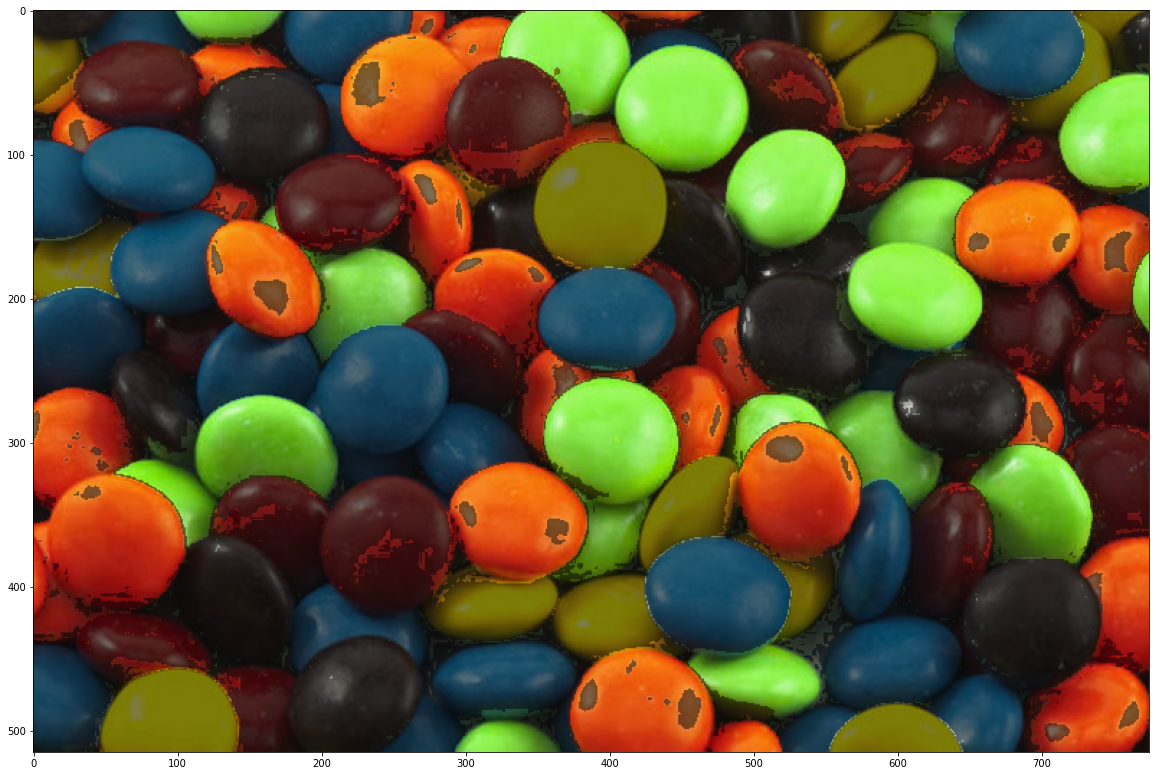

In [9]:
# Below you will find an example with oranges and greens just for reference so you can see what we want to accomplish
# In this example the oranges are not perfect, and it can be improved a lot easily.

## Mini project

### Level 1

#### Color tracker

1. Given an image with an specific color on it isolate the color and only show item with that color

### Level 2

#### Color tracker

1. Make it track a item in real time (either with a video or a webcam)

### Level 3

#### Color Tracker

1. Can you make it track two or more different items at the same time?